In [1]:
# import the data sets  using pandas 
import pandas as pd
Train_data=pd.read_csv('B:\\Feb_28 Data\\Titanic_train.csv')
Test_data=pd.read_csv('B:\\Feb_28 Data\\Titanic_test.csv')

In [2]:
# it will show the first five columns 
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
# Drop the Cabin column
Train_data = Train_data.drop(['Cabin'], axis=1)


In [77]:
# Check for missing values in the training dataset
print("Missing Values in Training Data:")
print(Train_data.isnull().sum())

# Fill missing values
# Handling missing values without the chained assignment warning
Train_data['Age'] = Train_data['Age'].fillna(Train_data['Age'].median())  # Impute with median for Age
Train_data['Embarked'] = Train_data['Embarked'].fillna(Train_data['Embarked'].mode()[0])  # Impute with mode for Embarked

# Check if the missing values are filled
print(Train_data.isnull().sum())


Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


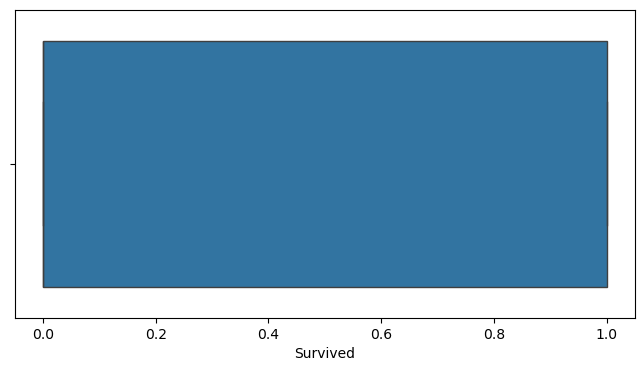

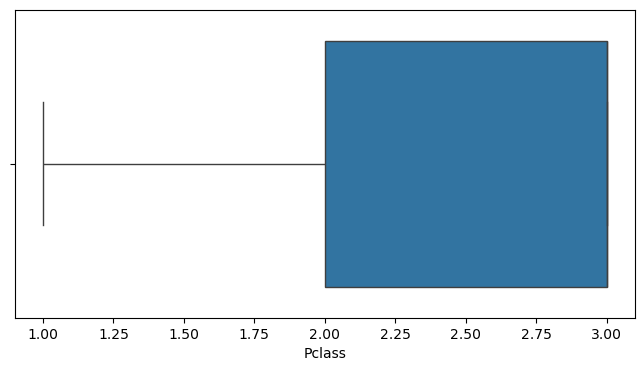

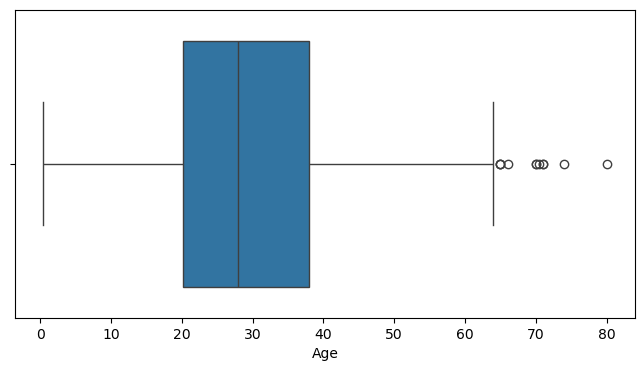

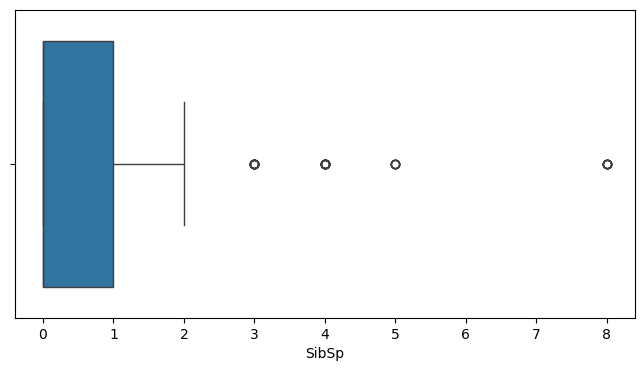

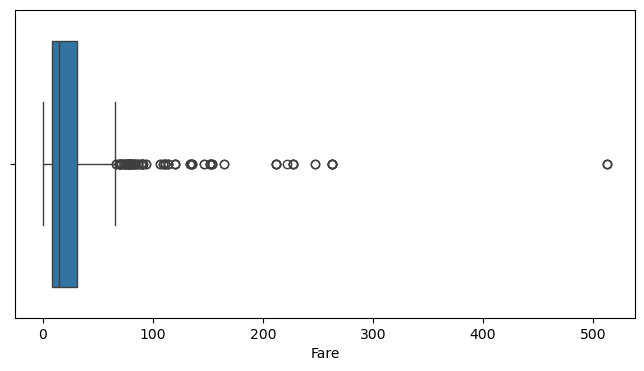

In [7]:
#EDA
# Scatter plot 
import matplotlib.pyplot as plt 
import seaborn as sns
for col in ['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col,data=Train_data)
    plt.show()
    

NameError: name 'df' is not defined

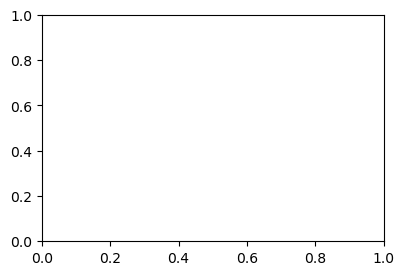

In [10]:
# If you want to plot histograms for all numerical columns, you can do:
columns = Train_data.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure
plt.figure(figsize=(15, 10))

# Loop through the selected columns and create a histogram for each
for i, column in enumerate(columns):
    plt.subplot(len(columns) // 3 + 1, 3, i + 1)  # Create subplots
    Train_data[column].hist(bins=20)  # Plot histogram with 20 bins
    plt.title(column)  # Add the title as the column name

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [79]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Train_data['Sex']=LE.fit_transform(Train_data['Sex'])
Train_data['Embarked']=LE.fit_transform(Train_data['Embarked'])

In [80]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [81]:
x_cont=Train_data[['Pclass','Sex','SibSp','Age','Parch','Fare','Embarked']]
x_cont

,Pclass,Sex,SibSp,Age,Parch,Fare,Embarked
0,3,1,1,22.0,0,7.2500,2
1,1,0,1,38.0,0,71.2833,0
2,3,0,0,26.0,0,7.9250,2
3,1,0,1,35.0,0,53.1000,2
4,3,1,0,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,0,27.0,0,13.0000,2
887,1,0,0,19.0,0,30.0000,2
888,3,0,1,28.0,2,23.4500,2
889,1,1,0,26.0,0,30.0000,0


In [82]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
fix=Scaler.fit_transform(x_cont)
fit=pd.DataFrame(fix)
d1=[['Pclass','Sex','SibSp','Age','Parch','Fare','Embarked']]
fit.columns=d1
fit.head()
X=fit
Y=Train_data['Survived']

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=100)

# Build the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_train=logreg.predict(X_train)
y_pred_test=logreg.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score
AS1=accuracy_score(y_train,y_pred_train)
AS2=accuracy_score(y_test,y_pred_test)
print("Training Accuracy Score:",AS1)
print("Test Accuracy Score:",AS2)

Training Accuracy Score: 0.8047752808988764
Test Accuracy Score: 0.8044692737430168


In [85]:
from sklearn.metrics import recall_score,precision_score,f1_score
RC1=recall_score(y_train,y_pred_train)
RC2=recall_score(y_test,y_pred_test)
PS1=precision_score(y_train,y_pred_train)
PS2=precision_score(y_test,y_pred_test)
f1_score1=f1_score(y_train,y_pred_train)
f1_score2=f1_score(y_test,y_pred_test)

In [86]:
print("Training recall Score:",RC1.round(2))
print("Test recall Score:",RC2.round(2))
print("Training precision Score:",PS1.round(2))
print("Test precision Score:",PS2.round(2))
print("Training F1 Score:",f1_score1.round(2))
print("Test F1 Score:",f1_score2.round(2))

Training recall Score: 0.7
Test recall Score: 0.71
Training precision Score: 0.76
Test precision Score: 0.8
Training F1 Score: 0.73
Test F1 Score: 0.75


In [87]:
Train_data['y_proba']=logreg.predict_proba(X)[:,1]
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,y_proba
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,0.088229
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0.922405
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0.630541
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,0.896230
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0.071358


In [88]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy=roc_curve(Train_data['Survived'],Train_data['y_proba'])

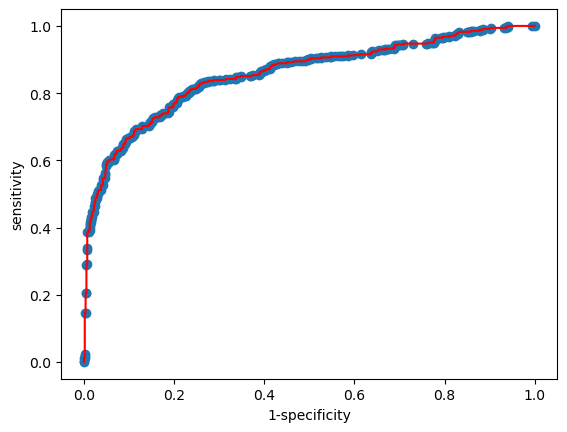

Area Under Curve: 0.8562058607356278


In [89]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='red')
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.show()
print('Area Under Curve:',roc_auc_score(Train_data['Survived'],Train_data['y_proba']))

In [90]:
Train_data=logreg.coef_

In [91]:
logreg.coef_

array([[-0.89445538, -1.31263897, -0.30592641, -0.51060643, -0.11787054,
         0.1224277 , -0.15518853]])